In [122]:
import numpy as np
import matplotlib.pyplot as plt
from Functions import *

In [6]:
# A 
print(SimpsonTable([1,2,2],[1,2,3],1,3))
print(TrapezTable([1,2,2],1,3,3))
print(TrapezTable([1,2],1,3,2))

2.444444444444444
2.333333333333333
1.5


In [16]:
# B
n = [1,2,3,4,5]
er = [3.77,0.94,0.42,0.24,0.15]

errorConvergece(n,er)

([-2.003831861591027,
  -1.9869161313178199,
  -1.9452577742021837,
  -2.1062837195053907],
 [0.2493368700265252, 0.4468085106382979, 0.5714285714285714, 0.625])

In [17]:
# C
0.03/0.01

3.0

In [90]:
# Function to be fitted:
F = lambda x: [1, np.sin(x), x*x]
# Function after fitting:
Fc = lambda x,c: c[0]+c[1]*np.sin(x)+c[2]*x*x

def print_table(A):
    """ Print matrix in nice format
    A: matrix
    """
    if type(A) != np.ndarray:
        A = np.array(A)
    m,n = A.shape
    for i in range(m):
        print("│",end="")
        for j in range(n-1):
            print("{:10.4f}".format(A[i,j]),end=" ")
        print("{:10.4f}".format(A[i,-1]),end=" ")
        print("│",end="")
        print()

def print_normal_equation(F,x,y):
    """ Print the normal equation for a given function F
    F: function to be fitted
    x: x-values
    """
    A = np.array(list(map(F,x)))
    print_table(A.T@A)
    print(np.round(A.T@y,4))

def fit(F,Fc,x,y):
    """ Fit a function to data using least squares
    F: function to be fitted
    Fc: function after fitting
    x: x-values
    y: y-values
    """
    A = np.array(list(map(F,x)))
    c = np.linalg.solve(A.T@A, A.T@y)
    return Fc(x,c),c


print_normal_equation(F,[0,1,2,3,4],[1,2,5,10,17])


│    5.0000     1.1351    30.0000 │
│    1.1351     2.1276    -6.3601 │
│   30.0000    -6.3601   354.0000 │
[ 35.     -5.225 384.   ]


In [85]:
def print_table(A):
    """ Print matrix in nice format
    A: matrix
    """
    if type(A) != np.ndarray:
        A = np.array(A)
    m,n = A.shape
    for i in range(m):
        print("│",end="")
        for j in range(n-1):
            print("{:10.4f}".format(A[i,j]),end=" ")
        print("{:10.4f}".format(A[i,-1]),end=" ")
        print("│",end="")
        print()


In [86]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [87]:
print_table(A)

│    1.0000     2.0000     3.0000 │
│    4.0000     5.0000     6.0000 │
│    7.0000     8.0000     9.0000 │


In [114]:
def SecondInterpolationError(n,M,h):
    """ Second interpolation error sentence
    n: order of the polynomial
    M: fourth derivative of the function
    h: step size
    """
    return 1/(4*(n+1)) * M *h**(n+1)
M = lambda x: 2**4*np.exp(2*x)
SecondInterpolationError(15,M(4),4/16)

1.735145917070173e-07

In [95]:
def InterpolerLagrangeForm(x, y, t):
    """ Calculates the values of the interpolating polynomial in Lagrange form
        x: list of nodes(knots)
        y: list of y-values
        t: points to evaluate the polynomial as list
        
    Returns:
        list: [P(t1) ... P(tm)]  a row with the m function values of the interpolating polynomial
    """
    cardinals = CardinalPolynomial(x,0,t)
    for i in range(1,len(x)):
        cardinals = np.vstack((cardinals,CardinalPolynomial(x,i,t)))

    cardinals = cardinals.T
    P_val = np.zeros(len(t))
    for idx in range(len(t)):
        P_val[idx] = np.sum(np.multiply(cardinals[idx],y))
    return P_val

In [104]:
f = lambda x: np.exp(2*x)
P_val = InterpolerLagrangeForm(np.linspace(0,4,15),f(np.linspace(0,4,15)),np.linspace(0,4,300))

In [110]:
error = np.abs(f(np.linspace(0,4,300))-P_val)

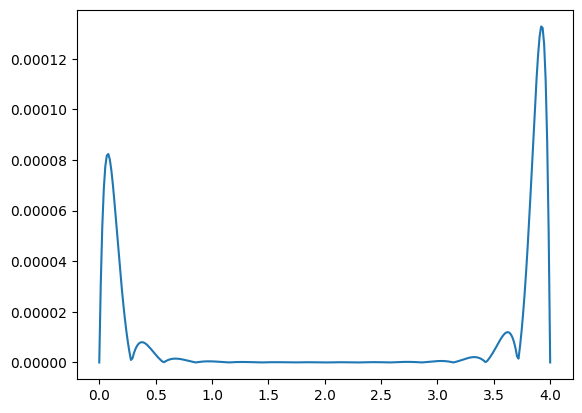

In [119]:
plt.plot(np.linspace(0,4,300),error);

In [112]:
error.max()

0.00013274258617457235

In [118]:
for i in range(14,25):
    if SecondInterpolationError(i,M(4),4/(i+1)) <= 10**(-8):
        print(i)
        break

17


In [145]:
A = [[2,1],[1,2]]

In [164]:
def Cholesky2L(A):
    """ Gives back each step to finding L
    A: matrix
    """
    if type(A) != np.ndarray:
        A = np.array(A)
    n = len(A)
    L = np.zeros((n,n))
    L_sym = [["" for i in range(n)] for j in range(n)]
    for i in range(n):
        for j in range(i+1):
            if i == j:
                L[i,j] = np.sqrt(A[i,j] - np.sum(L[i,:j]**2))
                if np.sum(L[i,:j]**2)==0:
                    L_sym[i][j] = f"sqrt({A[i,j]})"
                else: 
                    L_sym[i][j] = f"sqrt({A[i,j]} - {np.sum(L[i,:j])}^2)"
            else:
                L[i,j] = (A[i,j] - np.sum(L[i,:j]*L[j,:j]))/L[j,j]
                if np.sum(L[i,:j]*L[j,:j])==0:
                    L_sym[i][j] = f"{A[i,j]}/{L_sym[j][j]}"
                else:
                    L_sym[i][j] = f"({A[i,j]} - {np.sum(L[i,:j]*L[j,:j])})/{L[j,j]}"
    return L, L_sym

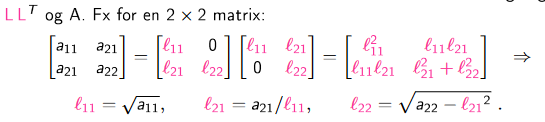

In [165]:
Cholesky2L(A)

(array([[1.41421356, 0.        ],
        [0.70710678, 1.22474487]]),
 [['sqrt(2)', ''], ['1/sqrt(2)', 'sqrt(2 - 0.7071067811865475^2)']])

In [171]:
def FdFOpgave4_1(X):
    f1 = lambda x: x[0]**2 + x[1]**2 - 4
    f2 = lambda x: x[1]-1/x[0]
    F = np.array([f1(X),f2(X)])
    df = np.array([[2*X[0],2*X[1]],[-1/X[0]**2,1]])
    return F, df


In [172]:
def Newtonsys(FdF, X0, kmax):
    """ Newton's method for solving systems of equations
    FdF: function returning F(x) and dF(x)
    X0: initial guess
    kmax: maximum number of iterations
    """
    X = X0
    
    Xiterations = []
    for k in range(kmax):
        Fx, dFx = FdF(X)
        H = np.linalg.solve(dFx, Fx)
        X = X - H.flatten()
        Xiterations.append(X)
    return np.array(Xiterations)

Newtonsys(FdFOpgave4_1,[2.0, 0.0],3)


array([[2.        , 0.5       ],
       [1.94117647, 0.48529412],
       [1.93328848, 0.51305819]])

In [173]:
# 5
def sys5(t,X):
    return np.array([X[1],-t**3*X[1]+t**2*X[0]+t])

In [192]:
RungeKutta4System(sys5,[-1,1],[1,1],10)

(array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 array([[1.        , 1.        ],
        [1.21719202, 1.15760768],
        [1.45742826, 1.23203282],
        [1.70578565, 1.24359036],
        [1.95282805, 1.22467928],
        [2.19597614, 1.21053797],
        [2.43970978, 1.23638984],
        [2.69552426, 1.33703257],
        [2.98163562, 1.54391783],
        [3.3214706 , 1.87533524],
        [3.73937661, 2.31887793]]))

In [179]:
np.linspace(-1,1,5)

array([-1. , -0.5,  0. ,  0.5,  1. ])